<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Ec_Cal_Met_Richa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método Implícito de Richardson**

Usaremos el método de diferencias regresivas cob $h=0.1$, $k=0.01$ para aproximar la solución de:

 $ \frac{\partial}{\partial t} =\frac{\partial^2 }{\partial x^2}$,$0<x<1$, $0<t$

Sujeto a las restricciones:

$u(0,t)=u(1,t)=0$, $0<t$, $u(x,0)=sen(πx)$, $0\leq x \leq 1$

Sustituyendo las diferencias regresivas en la ecuación de calor y simplicando obtenemos:

$(1+2λ)u_{i,j}-λu_{i+1,j}-λu_{i-1,j}=u_{i,j-1}$

Usando la igualdad anterior resolveremos el problema:

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

In [2]:
def f(x):
    return np.sin(np.pi*x)

In [17]:
n = 9
A = sp.zeros(n)

for i in range(n):
    A[i, i] = 3
    if i < n-1:
        A[i, i+1] = -1
        A[i+1, i] = -1

In [15]:
b = sp.Matrix([f(0.1 * i) for i in range(1, 10)])

In [16]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [18]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [19]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [20]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [21]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

In [22]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

Elegimos $t=0.1$ y comparamos con la gráfica de la solución exacta:

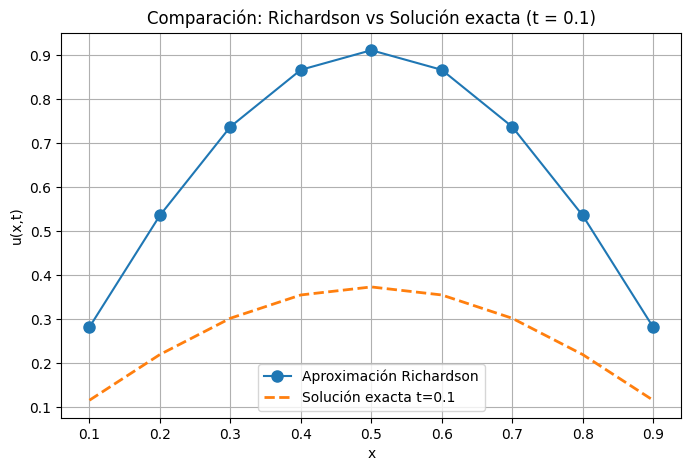

In [28]:
# Ejercicio 4: comparación para t = 0.1

t = 0.1
j = 1

U_num = richardson(A, b, j)[-1]

x = np.linspace(0.1, 0.9, 9)

U_exact = np.exp(-(np.pi**2)*t) * np.sin(np.pi * x)

plt.figure(figsize=(8,5))
plt.plot(x, U_num, 'o-', label="Aproximación Richardson", markersize=8)
plt.plot(x, U_exact, '--', label="Solución exacta t=0.1", linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Comparación: Richardson vs Solución exacta (t = 0.1)")
plt.legend()
plt.grid(True)
plt.show()

¿Es necesario resolver el sistema de $9 x 9$ o podemos hacer una simplificación?

En lugar de resolver el sistema de $9x9$, podemos simplemente usar la solución exacta en los puntos donde queremos evaluar. Es decir $u(x_i,t)=e^{-\pi^2t}sen(\pi x_i)$ con $x_i=0.1,...,0.9$, luego podremos definir $b=[f(0.1),...,f(0.9)]$ y sustituimos en la solución exacta para obtener cualquier $t$: $u(t)=e^{-\pi^2t}b$


In [29]:
j = 20 # Número de pasos en el tiempo

In [30]:
U=richardson(A, b, j)

In [33]:
x = np.linspace(0, 0.6, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

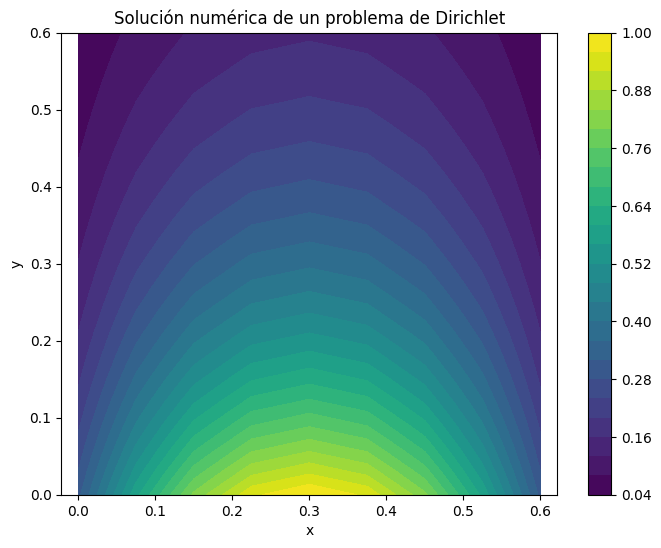

In [34]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

In [39]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>